In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from sklearn.cluster import DBSCAN

from mpl_toolkits.mplot3d import Axes3D 

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AffinityPropagation


## About The Dataset

In [2]:
# Read Data
df = pd.read_csv('PD data.csv')

# Display Feature Infromation
df.info()

# Display Data
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Equipment ID    559 non-null int64
PD Average      559 non-null float64
PD Count        559 non-null int64
Temperature     559 non-null float64
Humidity        559 non-null float64
Loading         559 non-null float64
dtypes: float64(4), int64(2)
memory usage: 26.3 KB


,Equipment ID,PD Average,PD Count,Temperature,Humidity,Loading
0,8558,424.19,19,27.0,56.0,250.0
1,8559,565.25,12,27.0,56.0,250.0
2,9244,1881.07,6,29.2,71.6,300.0
3,9379,774.28,14,26.3,71.5,585.0
4,9490,502.98,20,27.2,62.4,700.0
5,9500,3202.67,13,32.0,51.3,850.0
6,9501,3032.09,14,32.0,51.3,850.0
7,9499,3709.10,13,32.0,51.3,850.0
8,9747,1011.00,20,30.1,59.6,15.0
9,9749,1060.00,28,30.1,59.6,5.0


In [3]:
# Describe Data
df.describe()

,Equipment ID,PD Average,PD Count,Temperature,Humidity,Loading
count,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000
mean,18909.801431,683.493864,14.395349,29.149374,60.695832,350.438927
std,30724.742724,730.720851,10.286194,3.480390,12.083263,624.791790
min,748.000000,35.610000,1.000000,21.900000,37.180000,0.000000
25%,5605.500000,106.835000,7.000000,25.700000,52.890000,5.000000
50%,8745.000000,323.740000,12.000000,29.400000,61.100000,27.170000
75%,12682.000000,1137.920000,18.000000,32.000000,68.550000,457.000000
max,116980.000000,4891.420000,66.000000,39.900000,87.900000,2459.000000


## Correlation Heatmap

A correlation matric with P-Values in heatmap shows the relationship between features based on  correlation score. Which shows that humidity has a lower relation to the other features.

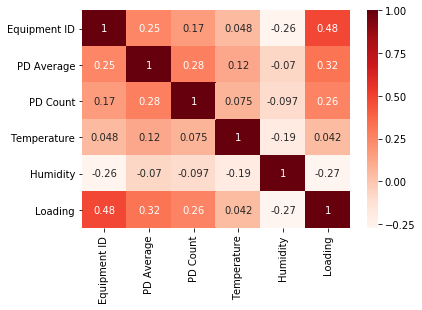

In [4]:
# Get correlation
corr = df.corr()

# Correlation Heatmap
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)

# Visualization
fig1 = plt.gcf()
plt.show()


## Scatter Plot

The following shows a 3D Scatter plot on Temperature, Humidity and Loading, assuming that these 3 features are affecting the results for PD Count and PD average, which measures the equipment health.
A Scatter plot was made for visualization purposes to identify if there are any outliers or anomaly visually.

Subsequently and similarly, 3 differnt scatter plots were done individually with PD count and PD Average.

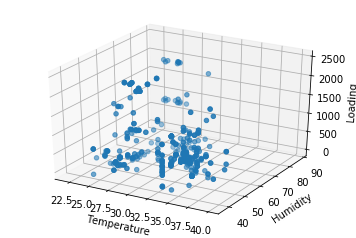

In [5]:
X = df.Temperature.values
Y = df.Humidity.values
Z = df.Loading.values

fig = plt.figure()
ax = plt.axes(projection="3d")
ax.scatter3D(X, Y, Z, cmap='hsv');

ax.set_xlabel('Temperature')
ax.set_ylabel('Humidity')
ax.set_zlabel('Loading')
plt.show()

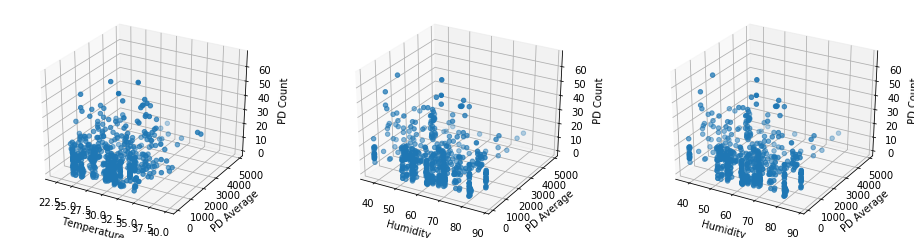

In [6]:
Temp = df.Temperature.values
Hum = df.Humidity.values
Load = df.Loading.values
Y = df['PD Average'].values
Z = df['PD Count'].values

fig = plt.figure(figsize=(16,4))

ax = fig.add_subplot(1, 3, 1, projection='3d')
ax.scatter3D(Temp, Y, Z, cmap='hsv');
ax.set_xlabel('Temperature')
ax.set_ylabel('PD Average')
ax.set_zlabel('PD Count')

ax = fig.add_subplot(1, 3, 2, projection='3d')
ax.scatter3D(Hum, Y, Z, cmap='hsv');
ax.set_xlabel('Humidity')
ax.set_ylabel('PD Average')
ax.set_zlabel('PD Count')

ax = fig.add_subplot(1, 3, 3, projection='3d')
ax.scatter3D(Hum, Y, Z, cmap='hsv');
ax.set_xlabel('Humidity')
ax.set_ylabel('PD Average')
ax.set_zlabel('PD Count')

plt.show()


## Correlation Value Ranking

A ranking of feature relationship was done with correlation P-Values in reference with with PD Average and PD Count.

In [7]:
# Correlation with output variable
# PD Average P Values
PDavg_pval = abs(corr['PD Average']).to_frame()
PDavg_pval.sort_values(by=['PD Average'], ascending=False)


,PD Average
PD Average,1.000000
Loading,0.323888
PD Count,0.283660
Equipment ID,0.254653
Temperature,0.123917
Humidity,0.069950


In [8]:
# PD Average P Values
PDc_pval = abs(corr['PD Count']).to_frame()
PDc_pval.sort_values(by=['PD Count'], ascending=False)


,PD Count
PD Count,1.000000
PD Average,0.283660
Loading,0.261152
Equipment ID,0.169129
Humidity,0.096785
Temperature,0.074758


## Outlier Detection with Interquantile Range

Outlier detection is experimented with interquantile range. This is to identify any pdata points that are outside of specific interquantile bracket, in this case, 10% to 90%.

In [9]:
# Interquantile Range(IQR) Outlier Detection
df_i = df.copy()
equip_id = df_i.pop('Equipment ID')

# Define Upper and Lower quantile
lo_quantile = df.quantile(0.1)
up_quantile = df.quantile(0.9)

# Get Interquantile range
iqr = up_quantile - lo_quantile
print(iqr)

df_i_outlier = df_i[((df_i < (lo_quantile - 1.5 * iqr))| (df_i > (up_quantile + 1.5 * iqr))).any(axis=1)]
df_i_outlier.insert(0, 'Equipment ID', equip_id)
df_i_outlier = df_i_outlier.dropna()
df_i_outlier

Equipment ID    15429.800
PD Average       1518.374
PD Count           22.000
Temperature         9.300
Humidity           36.632
Loading           997.400
dtype: float64


,Equipment ID,PD Average,PD Count,Temperature,Humidity,Loading
19,10866,442.73,62,31.1,66.40,4.0
85,19418,4891.42,10,29.4,77.50,265.0
86,19419,4361.75,10,29.4,77.50,265.0
147,9549,1188.57,66,32.5,62.00,450.0
210,115707,1231.41,62,28.1,41.91,2459.0


## Outlier Detection with Standard Deviation

Outlier detection is experimented next with Standard Deviation Z-Score. Identifying any datapoints with Z-Score above a specified Threshold.

In [10]:
# Z score Standard Deviation Outlier Detection
df_z = df.copy()
equip_id = df_z.pop('Equipment ID')

# Calculate Z score
z = np.abs(stats.zscore(df_z))

# Specify Treshold
threshold = 4

# Outliers
df_z_outlier = df[(z > threshold)]
df_z_outlier

,Equipment ID,PD Average,PD Count,Temperature,Humidity,Loading
7,9499,3709.10,13,32.0,51.30,850.0
19,10866,442.73,62,31.1,66.40,4.0
85,19418,4891.42,10,29.4,77.50,265.0
86,19419,4361.75,10,29.4,77.50,265.0
94,17786,3743.51,12,34.1,63.70,1500.0
147,9549,1188.57,66,32.5,62.00,450.0
210,115707,1231.41,62,28.1,41.91,2459.0


## Outlier Detection with Standard Deviation

Finally, outlier detection is experimented with DBScan Clustering techniques to identify noisy points that are outside those clusters.

In [11]:
# DBScan Clustering Outlier Detection
df_d = df.copy()
equip_id = df_d.pop('Equipment ID')

# Outlier Detection
dbscan = DBSCAN(min_samples=2, eps=250)

# Clustering
clusters = dbscan.fit_predict(df_d)

# -1 Represents Noisy points
print(list(clusters).count(-1))

# Outliers
df_d.insert(0, 'Equipment ID', equip_id)
df_d['Clusters'] = clusters
df_d_outlier = df_d.loc[df_d['Clusters'] == -1]
df_d_outlier

10


,Equipment ID,PD Average,PD Count,Temperature,Humidity,Loading,Clusters
7,9499,3709.10,13,32.0,51.30,850.0,-1
85,19418,4891.42,10,29.4,77.50,265.0,-1
86,19419,4361.75,10,29.4,77.50,265.0,-1
87,19420,3534.42,7,29.4,77.50,265.0,-1
93,17784,1701.85,20,35.6,53.90,1500.0,-1
94,17786,3743.51,12,34.1,63.70,1500.0,-1
121,18952,1737.56,16,26.9,43.40,1773.0,-1
141,8284,2358.81,9,29.4,67.10,1500.0,-1
248,11497,2629.09,25,25.7,56.20,700.0,-1
255,11495,2075.50,34,39.9,43.62,653.0,-1


## Outlier Detection Conclusion

In a short conclusion with the outlier detection methods, there were similar or overlapping output for all 3 experiment done.

In [12]:
df_d_outlier = df_d_outlier.drop(columns=['Clusters'])

# Concatenate all outlier dataframe
df_outlier = pd.concat([df_i_outlier, df_z_outlier, df_d_outlier], ignore_index=True)

# Get duplicated
dup_df = df_outlier[df_outlier.duplicated()]
dup_df = dup_df.apply(lambda x: x.sort_values().values)
dup_df

,Equipment ID,PD Average,PD Count,Temperature,Humidity,Loading
6,9499,442.73,10,28.1,41.91,4.0
7,9549,1188.57,10,29.4,51.30,265.0
8,10866,1231.41,10,29.4,62.00,265.0
10,17786,3709.10,10,29.4,63.70,265.0
11,19418,3743.51,12,29.4,66.40,265.0
12,19418,4361.75,13,31.1,77.50,450.0
13,19419,4361.75,62,32.0,77.50,850.0
14,19419,4891.42,62,32.5,77.50,1500.0
17,115707,4891.42,66,34.1,77.50,2459.0


## Additional Clustering for Visualization

Additional clustering was done for visualization purposes to identify similar datapoints. These were done using a basic clustering algorithm, K-means and Affinity Propagation Clustering. Clustering was done in 2 segments, firstly with every feature for an overview, with the exception of Equipment ID as it serves only as an index and secondly, with only with Temperature, Humidity and Loading. Basically to show the relation or likeliness of each datapoint.

The cluster their data point counts were also displayed. Suspecting outliers maybe be observed with the lower the number of data point counts in cluster.

<Figure size 432x288 with 0 Axes>

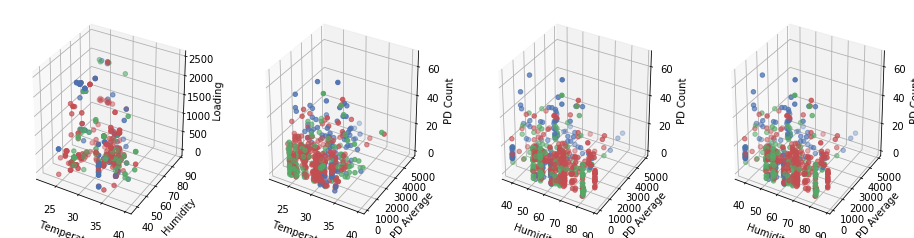

2    265
1    179
0    115
Name: Cluster, dtype: int64


,Equipment ID,PD Average,PD Count,Temperature,Humidity,Loading,Cluster
246,5459,702.58,12,24.6,51.21,1572.0,0
91,17661,1501.32,20,28.0,61.20,500.0,0
90,17628,2005.44,27,27.3,81.10,230.0,0
89,17627,2228.11,28,27.3,81.10,230.0,0
88,19422,2822.23,14,29.4,77.50,265.0,0
87,19420,3534.42,7,29.4,77.50,265.0,0
86,19419,4361.75,10,29.4,77.50,265.0,0
85,19418,4891.42,10,29.4,77.50,265.0,0
84,19421,2843.43,8,29.4,77.50,265.0,0
204,17949,1801.01,18,29.9,69.30,637.0,0


In [13]:
# K-Means Clustering
df_km = df.copy()
equip_id = df_km.pop('Equipment ID')

# Scaling of Data
col = df_km.columns.tolist()
df_km = pd.DataFrame(StandardScaler().fit_transform(df_km))
df_km.columns = col

# Clustering
km = KMeans(n_clusters=3)
km.fit_predict(df_km)

# Get Cluster Labels
km_clusters = km.labels_

# View Clusters
df_km_cluster = df.copy()
df_km_cluster['Cluster'] = km_clusters
df_km_cluster = df_km_cluster.sort_values(by=['Cluster'])

# Visualization
Temp = df_km_cluster.Temperature.values
Hum = df_km_cluster.Humidity.values
Load = df_km_cluster.Loading.values
Y = df_km_cluster['PD Average'].values
Z = df_km_cluster['PD Count'].values

# Color code for each clusters
palette = sns.color_palette('deep', np.unique(km_clusters).max() + 1)
colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in km_clusters]

fig = plt.figure()
fig = plt.figure(figsize=(16,4))

ax = fig.add_subplot(1, 4, 1, projection='3d')
ax.scatter3D(Temp, Hum, Load, c=colors);
ax.set_xlabel('Temperature')
ax.set_ylabel('Humidity')
ax.set_zlabel('Loading')

ax = fig.add_subplot(1, 4, 2, projection='3d')
ax.scatter3D(Temp, Y, Z, c=colors);
ax.set_xlabel('Temperature')
ax.set_ylabel('PD Average')
ax.set_zlabel('PD Count')

ax = fig.add_subplot(1, 4, 3, projection='3d')
ax.scatter3D(Hum, Y, Z, c=colors);
ax.set_xlabel('Humidity')
ax.set_ylabel('PD Average')
ax.set_zlabel('PD Count')

ax = fig.add_subplot(1, 4, 4, projection='3d')
ax.scatter3D(Hum, Y, Z, c=colors);
ax.set_xlabel('Humidity')
ax.set_ylabel('PD Average')
ax.set_zlabel('PD Count')
plt.show()

print(df_km_cluster['Cluster'].value_counts())
df_km_cluster

<Figure size 432x288 with 0 Axes>

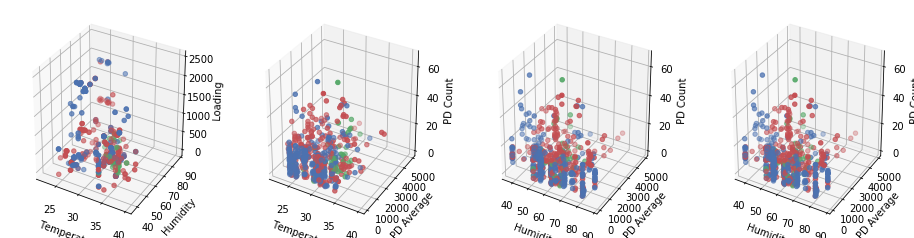

0    267
2    242
1     50
Name: Cluster, dtype: int64


,Equipment ID,PD Average,PD Count,Temperature,Humidity,Loading,Cluster
279,116980,1816.51,6,34.1,64.5,26.0,0
327,8538,146.30,18,33.5,37.6,77.0,0
326,5600,98.22,10,33.5,37.6,77.0,0
323,8529,93.35,14,33.5,37.6,392.0,0
322,5603,89.85,13,33.5,37.6,392.0,0
321,8530,97.18,11,33.5,37.6,616.0,0
320,5604,92.86,18,33.5,37.6,616.0,0
319,8531,86.05,10,33.5,37.6,720.0,0
318,5605,106.95,11,33.5,37.6,720.0,0
328,5602,100.92,17,33.5,37.6,919.0,0


In [14]:
# K-Means Clustering based on just Temperature, Humidity, Loading
df_km = df.copy()
df_km = df_km[['Temperature', 'Humidity', 'Loading']]

# Scaling of Data
col = df_km.columns.tolist()
df_km = pd.DataFrame(StandardScaler().fit_transform(df_km))
df_km.columns = col

# Clustering
km = KMeans(n_clusters=3)
km.fit_predict(df_km)

# Get Cluster Labels
km_clusters = km.labels_

# View Clusters
df_km_cluster = df.copy()
df_km_cluster['Cluster'] = km_clusters
df_km_cluster = df_km_cluster.sort_values(by=['Cluster'])

# Visualization
Temp = df_km_cluster.Temperature.values
Hum = df_km_cluster.Humidity.values
Load = df_km_cluster.Loading.values
Y = df_km_cluster['PD Average'].values
Z = df_km_cluster['PD Count'].values

# Color code for each clusters
palette = sns.color_palette('deep', np.unique(km_clusters).max() + 1)
colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in km_clusters]

fig = plt.figure()
fig = plt.figure(figsize=(16,4))

ax = fig.add_subplot(1, 4, 1, projection='3d')
ax.scatter3D(Temp, Hum, Load, c=colors);
ax.set_xlabel('Temperature')
ax.set_ylabel('Humidity')
ax.set_zlabel('Loading')

ax = fig.add_subplot(1, 4, 2, projection='3d')
ax.scatter3D(Temp, Y, Z, c=colors);
ax.set_xlabel('Temperature')
ax.set_ylabel('PD Average')
ax.set_zlabel('PD Count')

ax = fig.add_subplot(1, 4, 3, projection='3d')
ax.scatter3D(Hum, Y, Z, c=colors);
ax.set_xlabel('Humidity')
ax.set_ylabel('PD Average')
ax.set_zlabel('PD Count')

ax = fig.add_subplot(1, 4, 4, projection='3d')
ax.scatter3D(Hum, Y, Z, c=colors);
ax.set_xlabel('Humidity')
ax.set_ylabel('PD Average')
ax.set_zlabel('PD Count')
plt.show()

print(df_km_cluster['Cluster'].value_counts())
df_km_cluster

<Figure size 432x288 with 0 Axes>

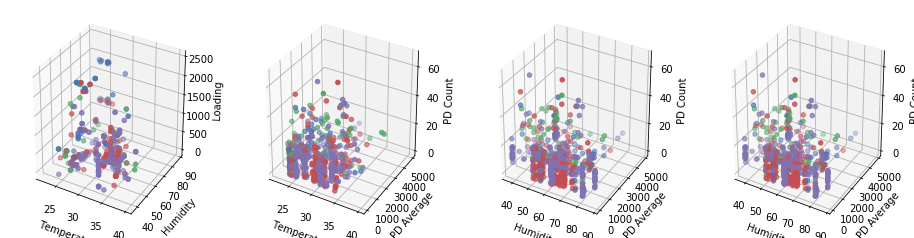

3    221
2    204
0     68
1     66
Name: Cluster, dtype: int64


,Equipment ID,PD Average,PD Count,Temperature,Humidity,Loading,Cluster
219,115709,1822.54,8,28.9,41.34,2459.00,0
60,12683,782.61,27,27.8,80.10,1000.00,0
58,12683,820.65,25,26.8,81.00,1000.00,0
55,12683,743.24,33,27.0,79.80,1000.00,0
177,115288,727.86,53,24.4,39.50,650.00,0
178,115289,786.28,41,24.4,39.50,650.00,0
207,115707,1232.85,23,30.5,43.84,2459.00,0
208,115707,1152.68,33,30.3,50.03,2459.00,0
209,115707,1203.47,11,28.8,42.85,2459.00,0
210,115707,1231.41,62,28.1,41.91,2459.00,0


In [15]:
# Affinity Propagation Clustering
df_ap = df.copy()
equip_id = df_ap.pop('Equipment ID')

# Scaling of Data
col = df_ap.columns.tolist()
df_ap = pd.DataFrame(StandardScaler().fit_transform(df_ap))
df_ap.columns = col

# Clustering
ap = AffinityPropagation(preference=-200)
ap.fit_predict(df_ap)

# Get Cluster Labels
ap_clusters = ap.labels_

# View Clusters
df_ap_cluster = df.copy()
df_ap_cluster['Cluster'] = ap_clusters
df_ap_cluster = df_ap_cluster.sort_values(by=['Cluster'])

# Visualization
Temp = df_ap_cluster.Temperature.values
Hum = df_ap_cluster.Humidity.values
Load = df_ap_cluster.Loading.values
Y = df_ap_cluster['PD Average'].values
Z = df_ap_cluster['PD Count'].values

# Color code for each clusters
palette = sns.color_palette('deep', np.unique(ap_clusters).max() + 1)
colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in ap_clusters]

fig = plt.figure()
fig = plt.figure(figsize=(16,4))

ax = fig.add_subplot(1, 4, 1, projection='3d')
ax.scatter3D(Temp, Hum, Load, c=colors);
ax.set_xlabel('Temperature')
ax.set_ylabel('Humidity')
ax.set_zlabel('Loading')

ax = fig.add_subplot(1, 4, 2, projection='3d')
ax.scatter3D(Temp, Y, Z, c=colors);
ax.set_xlabel('Temperature')
ax.set_ylabel('PD Average')
ax.set_zlabel('PD Count')

ax = fig.add_subplot(1, 4, 3, projection='3d')
ax.scatter3D(Hum, Y, Z, c=colors);
ax.set_xlabel('Humidity')
ax.set_ylabel('PD Average')
ax.set_zlabel('PD Count')

ax = fig.add_subplot(1, 4, 4, projection='3d')
ax.scatter3D(Hum, Y, Z, c=colors);
ax.set_xlabel('Humidity')
ax.set_ylabel('PD Average')
ax.set_zlabel('PD Count')
plt.show()

print(df_ap_cluster['Cluster'].value_counts())
df_ap_cluster

<Figure size 432x288 with 0 Axes>

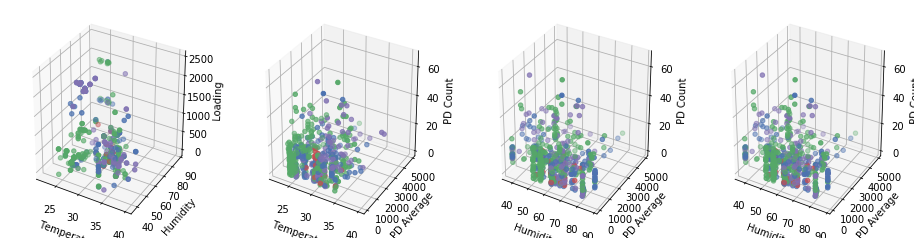

1    271
0    131
3    124
2     33
Name: Cluster, dtype: int64


,Equipment ID,PD Average,PD Count,Temperature,Humidity,Loading,Cluster
91,17661,1501.32,20,28.0,61.20,500.0,0
398,4020,112.67,4,25.7,80.60,2.0,0
399,4019,100.79,8,25.7,80.60,2.0,0
400,4018,77.30,1,25.7,80.60,5.0,0
401,4017,115.22,16,25.7,80.60,5.0,0
402,4016,89.11,15,25.7,80.60,0.0,0
403,4015,241.64,4,25.7,80.60,0.0,0
404,4014,93.07,17,25.7,80.60,3.0,0
204,17949,1801.01,18,29.9,69.30,637.0,0
405,4013,97.72,10,25.7,80.60,3.0,0


In [16]:
# Affinity Propagation Clustering based on just Temperature, Humidity, Loading
df_ap = df.copy()
df_ap = df_ap[['Temperature', 'Humidity', 'Loading']]

# Scaling of Data
col = df_ap.columns.tolist()
df_ap = pd.DataFrame(StandardScaler().fit_transform(df_ap))
df_ap.columns = col

# Clustering
ap = AffinityPropagation(preference=-200, damping=0.8)
ap.fit_predict(df_ap)

# Get Cluster Labels
ap_clusters = ap.labels_

# View Clusters
df_ap_cluster = df.copy()
df_ap_cluster['Cluster'] = ap_clusters
df_ap_cluster = df_ap_cluster.sort_values(by=['Cluster'])

# Visualization
Temp = df_ap_cluster.Temperature.values
Hum = df_ap_cluster.Humidity.values
Load = df_ap_cluster.Loading.values
Y = df_ap_cluster['PD Average'].values
Z = df_ap_cluster['PD Count'].values

# Color code for each clusters
palette = sns.color_palette('deep', np.unique(ap_clusters).max() + 1)
colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in ap_clusters]

fig = plt.figure()
fig = plt.figure(figsize=(16,4))

ax = fig.add_subplot(1, 4, 1, projection='3d')
ax.scatter3D(Temp, Hum, Load, c=colors);
ax.set_xlabel('Temperature')
ax.set_ylabel('Humidity')
ax.set_zlabel('Loading')

ax = fig.add_subplot(1, 4, 2, projection='3d')
ax.scatter3D(Temp, Y, Z, c=colors);
ax.set_xlabel('Temperature')
ax.set_ylabel('PD Average')
ax.set_zlabel('PD Count')

ax = fig.add_subplot(1, 4, 3, projection='3d')
ax.scatter3D(Hum, Y, Z, c=colors);
ax.set_xlabel('Humidity')
ax.set_ylabel('PD Average')
ax.set_zlabel('PD Count')

ax = fig.add_subplot(1, 4, 4, projection='3d')
ax.scatter3D(Hum, Y, Z, c=colors);
ax.set_xlabel('Humidity')
ax.set_ylabel('PD Average')
ax.set_zlabel('PD Count')
plt.show()

print(df_ap_cluster['Cluster'].value_counts())
df_ap_cluster